In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as xp
sns.set(rc={'figure.figsize': (10, 5)})

In [27]:
#Read Data
path="/content/drive/MyDrive/Dataset/heart.csv"
df=pd.read_csv(path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
#Rename Dataset Columns
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [29]:
# rename columns
new_columns = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','target']
df.columns = new_columns

In [30]:
#Data Exploration & Cleaning
df.shape

(303, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
### see null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

In [33]:
import sys
!{sys.executable} -m pip install missingno

<Axes: >

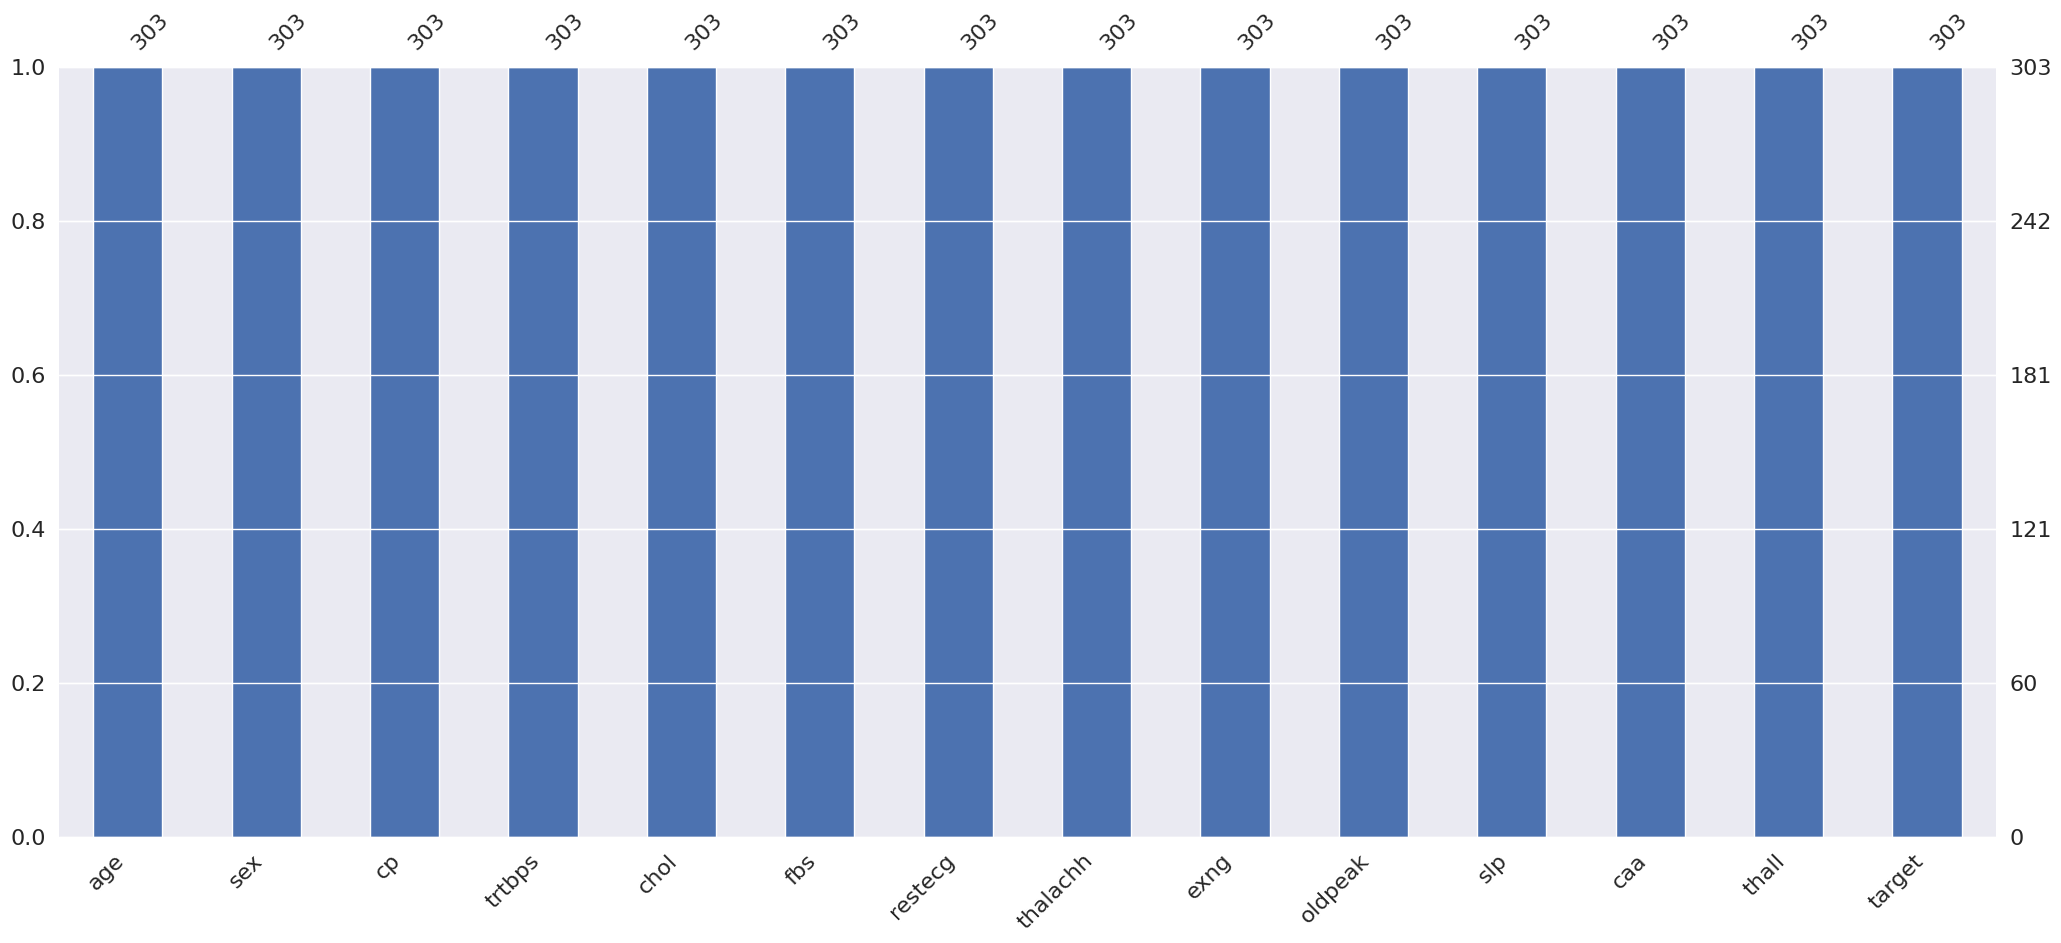

In [34]:
### see null values using missingo
import missingno as msno
msno.bar(df,color='b')

In [35]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
#Check if Column is Categorical or Numbers
df['cp'].value_counts() # ----> category

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [37]:
df['cp'].value_counts().count()

4

In [38]:
df['oldpeak'].value_counts() # -----> numbers

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [39]:
# function to know is this column category , numbery
unique_values = []
for c in df.columns:
    v_c = df[c].value_counts().count()
    unique_values.append(v_c)

pd.DataFrame(unique_values,index=df.columns,columns=['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [40]:
#Split Columns into numeric_cols a& categorical_cols
numeric_cols = ['age','trtbps','chol','thalachh','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall','target']

In [41]:
# remove duplicate
df.duplicated().sum()

1

In [42]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='age'>

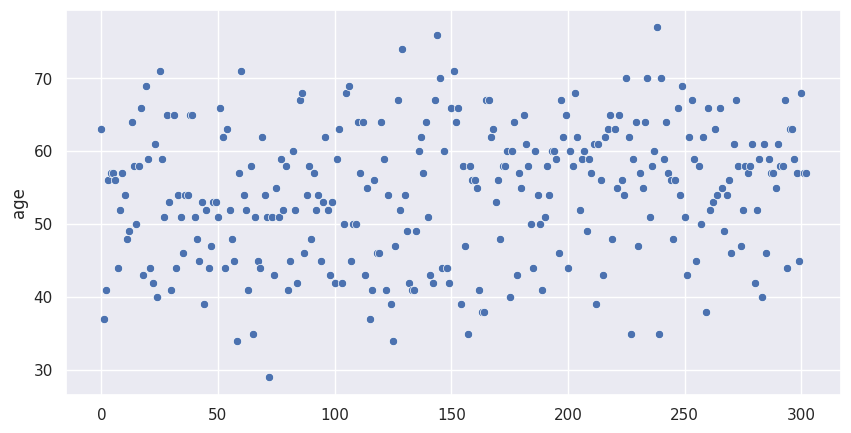

In [43]:
#Visualize Numeric Values
sns.scatterplot(df['age'])


Text(0.5, 1.0, 'Age')

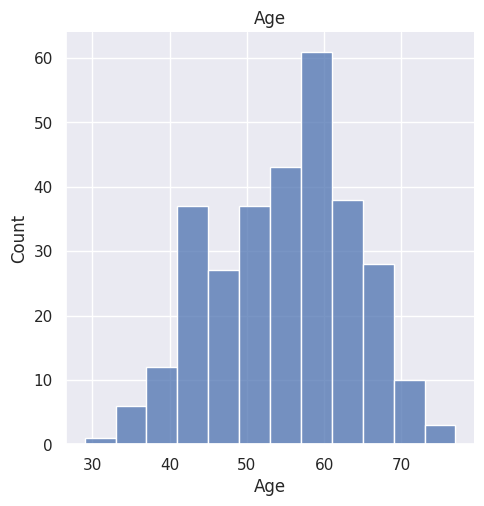

In [44]:
# viaualize numeric ---> category : using historgram
sns.displot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')

Text(0.5, 1.0, 'trtbps')

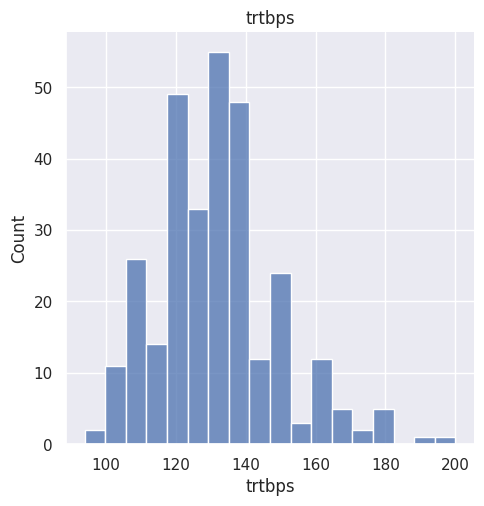

In [45]:
sns.displot(df['trtbps'])
plt.xlabel('trtbps')
plt.ylabel('Count')
plt.title('trtbps')

Text(0.5, 1.0, 'chol')

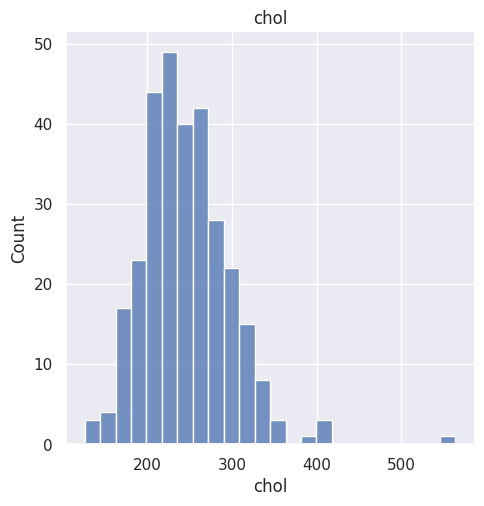

In [46]:
sns.displot(df['chol'])
plt.xlabel('chol')
plt.ylabel('Count')
plt.title('chol')

Text(0.5, 1.0, 'thalachh')

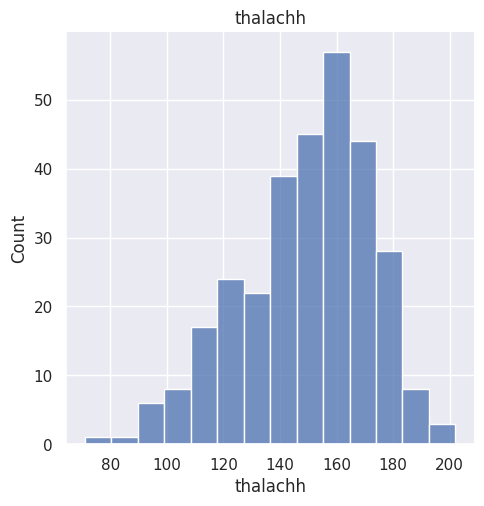

In [47]:
sns.displot(df['thalachh'])
plt.xlabel('thalachh')
plt.ylabel('Count')
plt.title('thalachh')

Text(0.5, 1.0, 'oldpeak')

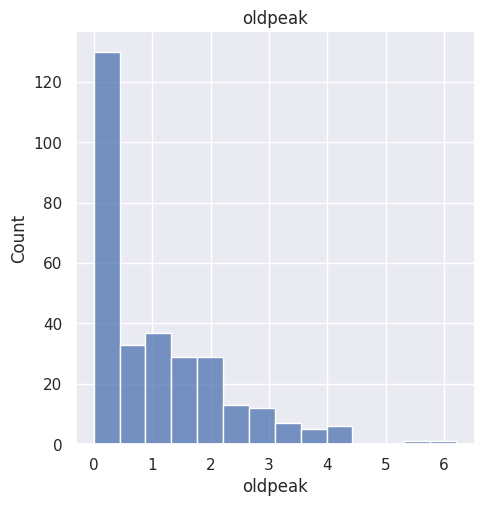

In [48]:
sns.displot(df['oldpeak'])
plt.xlabel('oldpeak')
plt.ylabel('Count')
plt.title('oldpeak')

In [49]:
#Visualize Categorical Values
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'target']

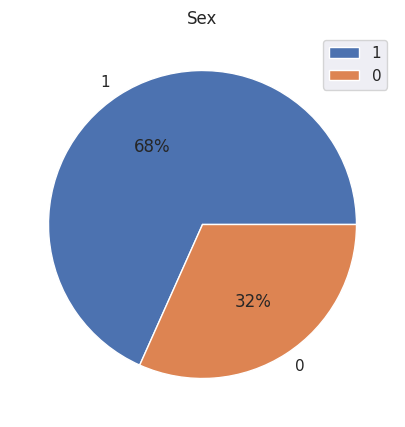

In [50]:
plt.pie(df['sex'].value_counts(),autopct='%.0f%%',labels=df['sex'].value_counts().index)
plt.title('Sex')
plt.legend()

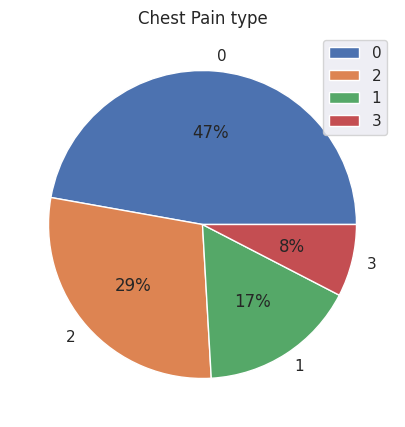

In [51]:
plt.pie(df['cp'].value_counts(),autopct='%.0f%%',labels=df['cp'].value_counts().index)
plt.title('Chest Pain type')
plt.legend()

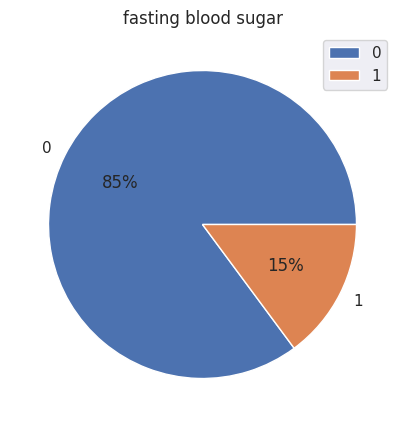

In [52]:
plt.pie(df['fbs'].value_counts(),autopct='%.0f%%',labels=df['fbs'].value_counts().index)
plt.title('fasting blood sugar')
plt.legend()

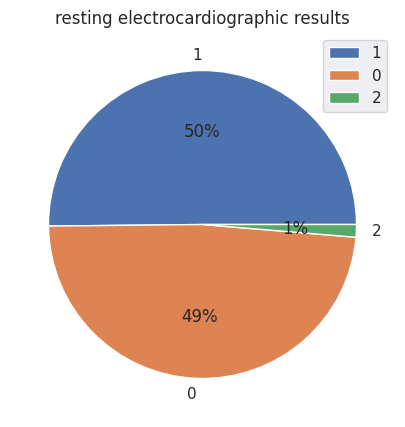

In [53]:
plt.pie(df['restecg'].value_counts(),autopct='%.0f%%',labels=df['restecg'].value_counts().index)
plt.title('resting electrocardiographic results')
plt.legend()

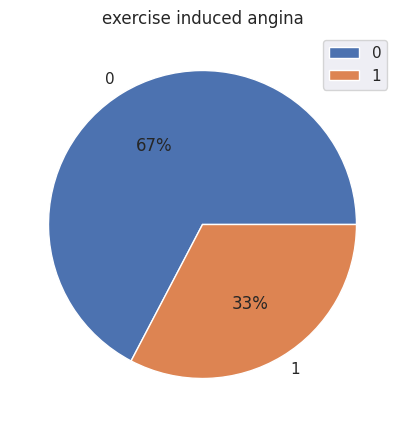

In [54]:
plt.pie(df['exng'].value_counts(),autopct='%.0f%%',labels=df['exng'].value_counts().index)
plt.title('exercise induced angina')
plt.legend()

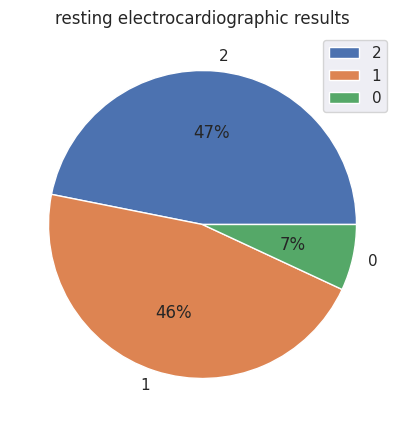

In [55]:
plt.pie(df['slp'].value_counts(),autopct='%.0f%%',labels=df['slp'].value_counts().index)
plt.title('resting electrocardiographic results')
plt.legend()

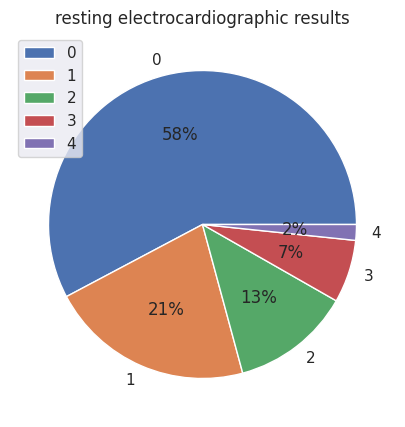

In [56]:
plt.pie(df['caa'].value_counts(),autopct='%.0f%%',labels=df['caa'].value_counts().index)
plt.title('resting electrocardiographic results')
plt.legend()

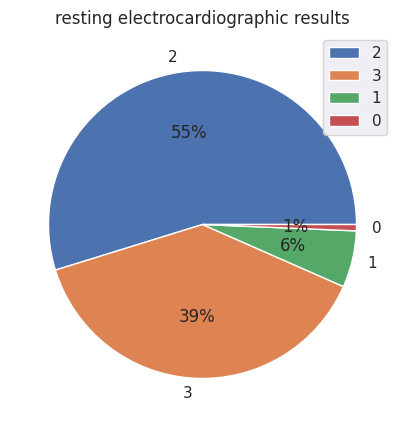

In [57]:
plt.pie(df['thall'].value_counts(),autopct='%.0f%%',labels=df['thall'].value_counts().index)
plt.title('resting electrocardiographic results')
plt.legend()

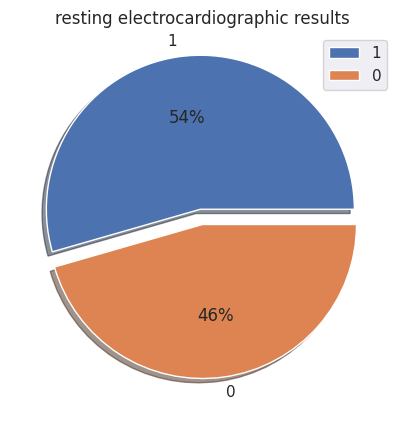

In [58]:
myexplod = [.1,0]
plt.pie(df['target'].value_counts(),autopct='%.0f%%',labels=df['target'].value_counts().index,explode=myexplod,shadow=True)
plt.title('resting electrocardiographic results')
plt.legend()

In [59]:
#Bivariate Analysis : Categorical
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'target']

<Axes: xlabel='sex', ylabel='count'>

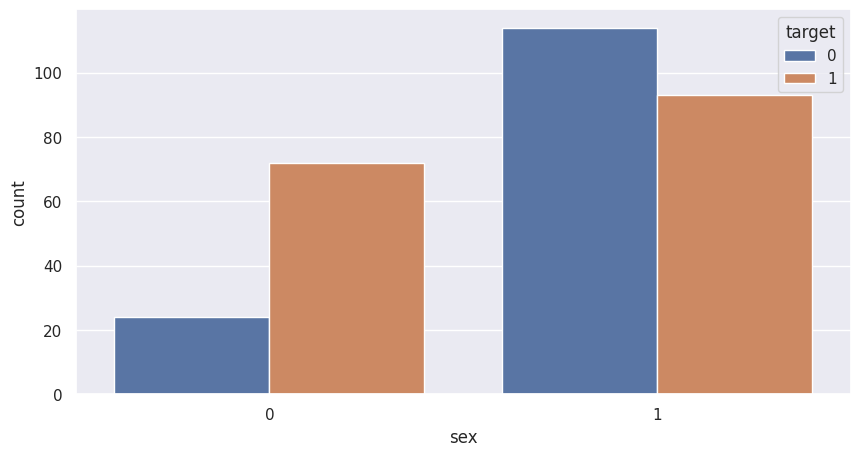

In [60]:
sns.countplot(x='sex',hue='target',data=df)

<Axes: xlabel='cp', ylabel='count'>

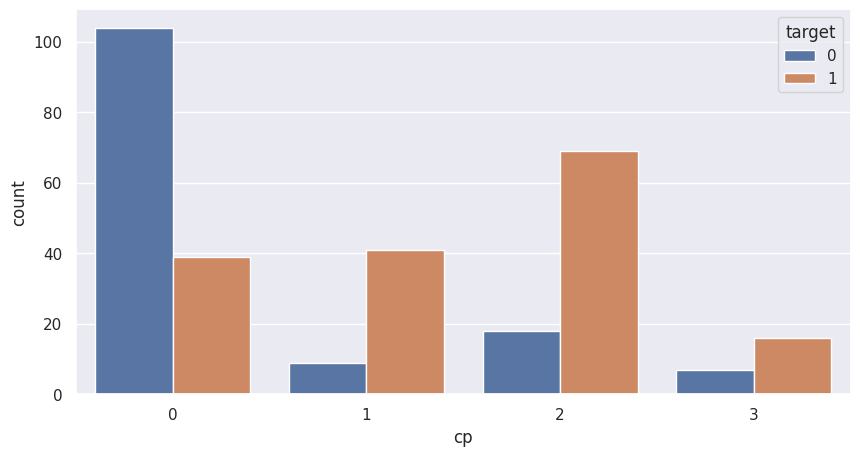

In [61]:
sns.countplot(x='cp',hue='target',data=df)

<Axes: xlabel='fbs', ylabel='count'>

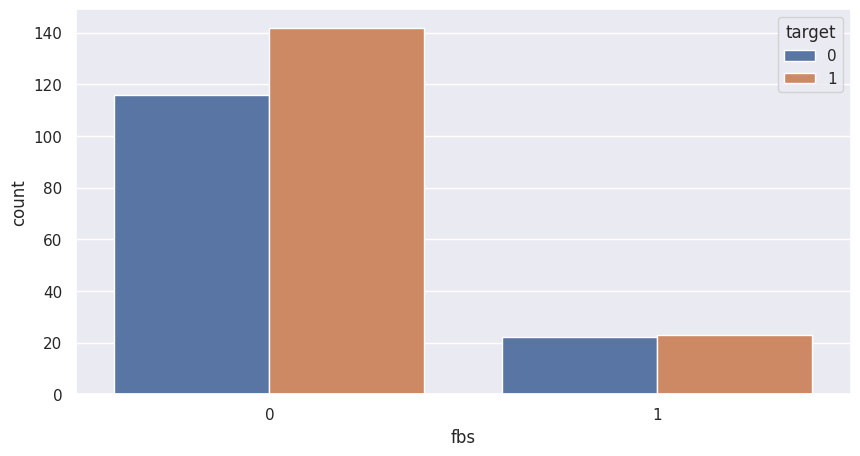

In [62]:
sns.countplot(x='fbs',hue='target',data=df)

<Axes: xlabel='restecg', ylabel='count'>

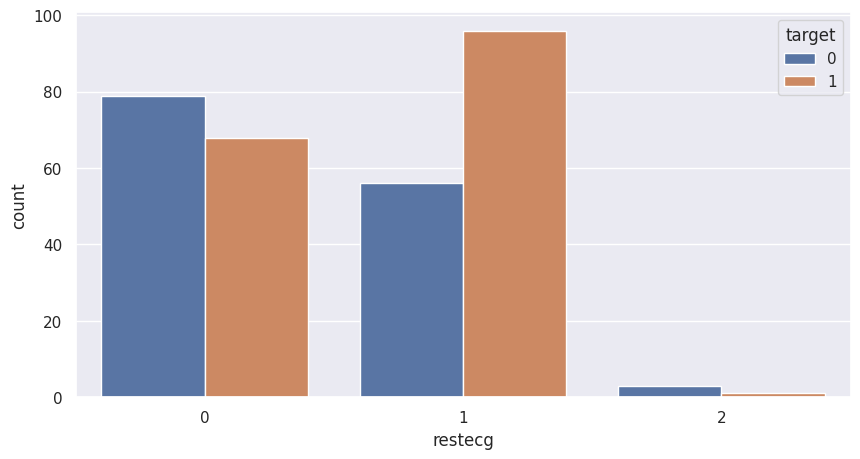

In [63]:
sns.countplot(x='restecg',hue='target',data=df)

<Axes: xlabel='exng', ylabel='count'>

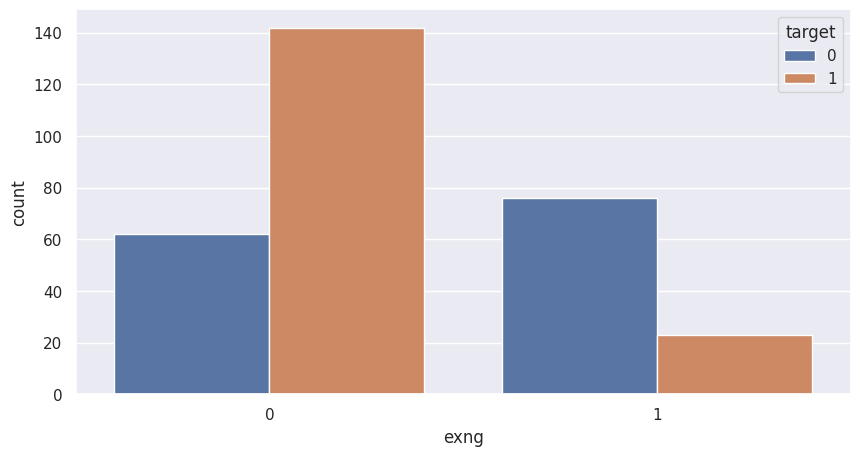

In [64]:
sns.countplot(x='exng',hue='target',data=df)

<Axes: xlabel='slp', ylabel='count'>

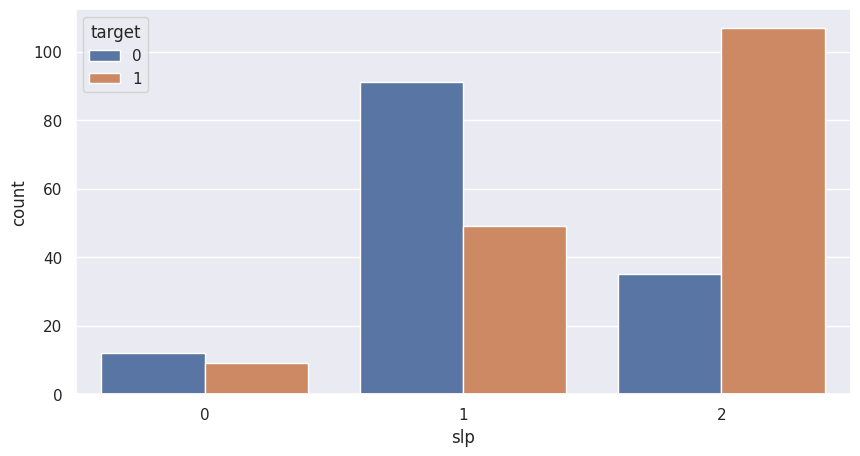

In [65]:
sns.countplot(x='slp',hue='target',data=df)

<Axes: xlabel='caa', ylabel='count'>

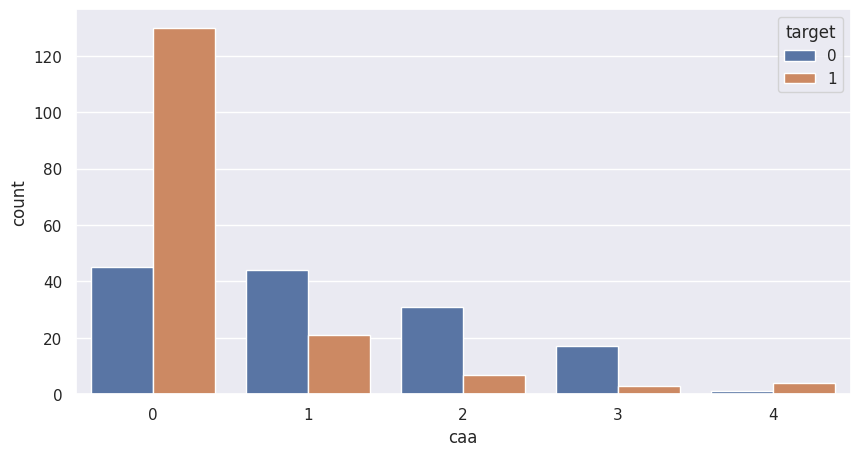

In [66]:
sns.countplot(x='caa',hue='target',data=df)

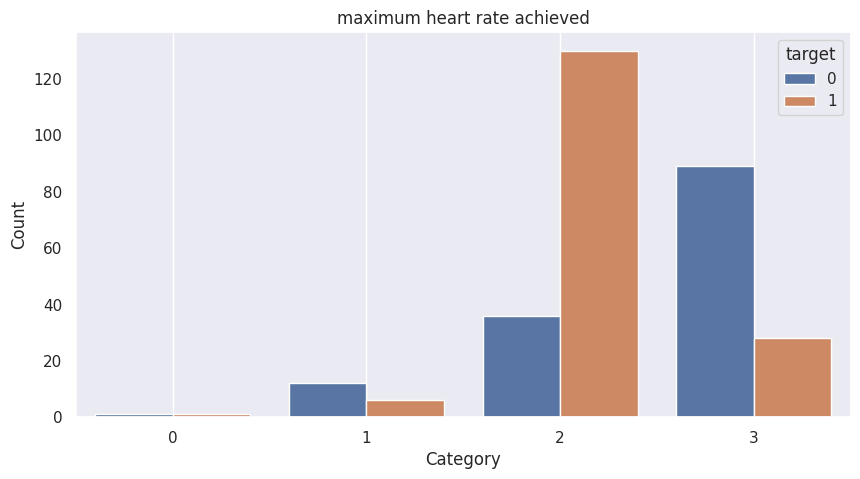

In [67]:
sns.countplot(x='thall',hue='target',data=df)
plt.title('maximum heart rate achieved')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid()

In [68]:
#Correllation
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

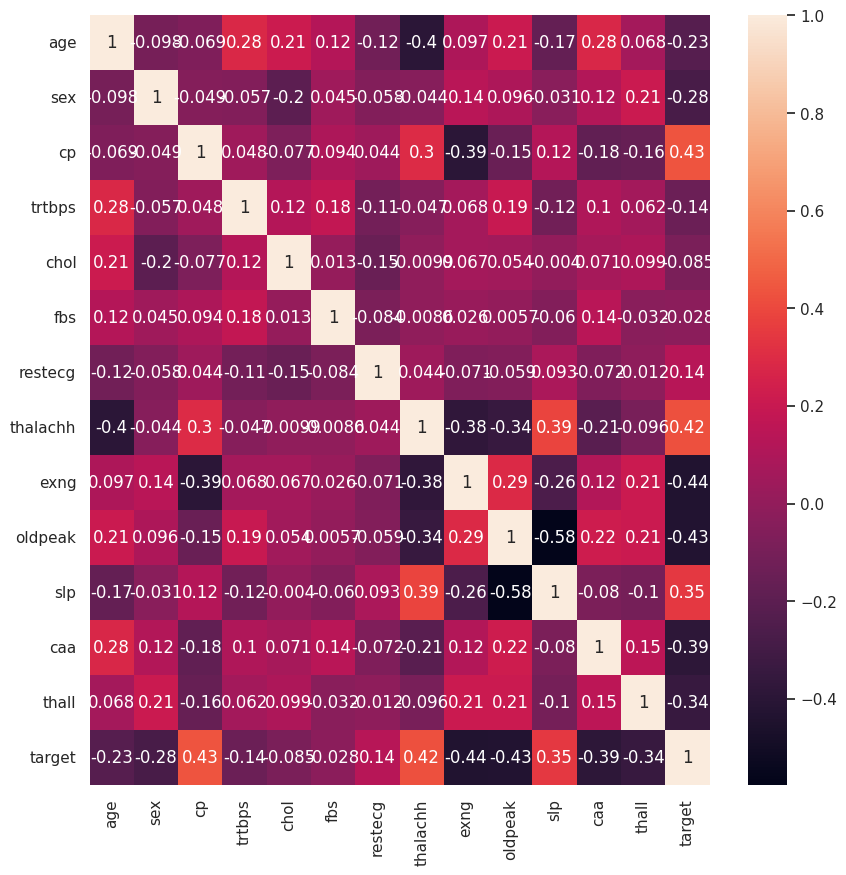

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: >

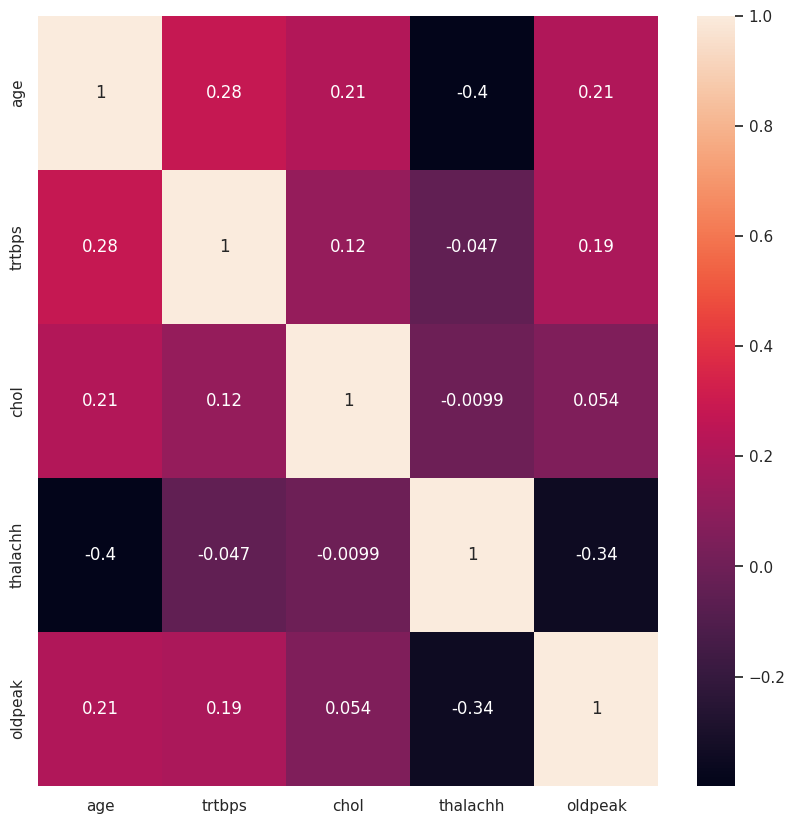

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_cols].corr(),annot=True)

<Axes: >

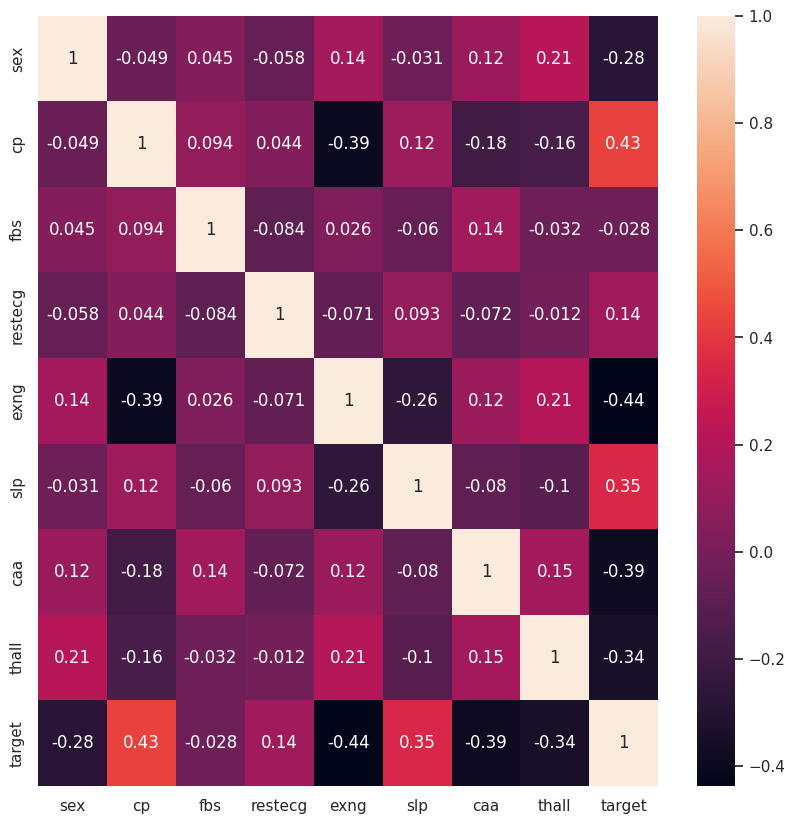

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(df[categorical_cols].corr(),annot=True)

In [72]:
df[categorical_cols].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
restecg,0.137230
exng,-0.436757
slp,0.345877
caa,-0.391724
thall,-0.344029
target,1.000000


In [73]:
#Using Plotly To Visualize With Percentage
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'target']

In [74]:
sex_count = df['sex'].value_counts().reset_index()
sex_count.columns = ['sex','Count']
sex_count

,sex,Count
0,1,207
1,0,96


In [75]:
sex_count = df['sex'].value_counts().reset_index()
sex_count.columns = ['sex','Count']
fig = xp.pie(sex_count,names='sex', values='Count')
fig.show()

In [76]:
sex_count = df['caa'].value_counts().reset_index()
sex_count.columns = ['caa','Count']
fig = xp.pie(sex_count,names='caa', values='Count')
fig.show()

In [77]:
fig = xp.bar(df, x='caa',y='target',color='sex', hover_data=['fbs','thall'],height=1000)
fig.show()

In [78]:
#Build Machine Learning Model
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')


In [79]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
# encode the categorical columns
df2 = pd.get_dummies(df,columns=categorical_cols[:-1],drop_first=True)

In [81]:
df2.head()

,age,trtbps,chol,thalachh,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [82]:
# define x & y
x = df2.drop(["target"],axis=1)
y = df2[["target"]]

In [83]:
# train test split
X_train , X_test,y_train,y_test = train_test_split(x,y , test_size=0.1 , random_state=10)

In [85]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# build model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)

# predict
y_pred = dt_model.predict(X_test)

# score
accuracy_score(y_test,y_pred)

0.6774193548387096

In [86]:
## decision tree with cross validation
scores = cross_val_score(dt_model , X_test , y_test , cv=10)
scores.mean()

0.75

In [87]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# model
rf_model = RandomForestClassifier()
rf_model.fit(X_train , y_train)

# predict
y_pred = rf_model.predict(X_test)

# score
accuracy_score(y_test,y_pred)

0.8387096774193549

In [89]:
## Grid Search with randomforest

rf_model2 = RandomForestClassifier()
parameters = {
    'n_estimators' : [10,50,100,150,200] ,
    'criterion' : ['gini','entropy'] ,
    'bootstrap' : [True,False]
}

rd_model_gs = GridSearchCV(rf_model2 , param_grid=parameters)
rd_model_gs.fit(X_train , y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [90]:
rd_model_gs.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 50}

In [91]:
f_rd_m = RandomForestClassifier(bootstrap= True, criterion= 'gini', n_estimators= 50)
f_rd_m.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [92]:
# predict
y_pred = f_rd_m.predict(X_test)

# score
accuracy_score(y_test,y_pred)

0.8709677419354839

In [93]:
#SVC
from sklearn.svm import SVC

# model
svc_model = SVC()
svc_model.fit(X_train , y_train)

# predict
y_pred = svc_model.predict(X_test)

# score
accuracy_score(y_test,y_pred)

0.6451612903225806

In [94]:
#Save The Model
import pickle

filename = 'final_model.sav'
saved_model = pickle.dump(f_rd_m ,open(filename, 'wb'))

In [95]:
#Load The Model
# load
model_from_pickle = pickle.load(open(filename, 'rb'))


In [96]:
#Make Prediction
model_from_pickle.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1])

In [97]:
X_test.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex_1', 'cp_1', 'cp_2',
       'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exng_1', 'slp_1', 'slp_2',
       'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_1', 'thall_2', 'thall_3'],
      dtype='object')

In [98]:
data = [[50,170,1,150,1.2,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1]]
model_from_pickle.predict(data)

array([0])

In [ ]:
#Deployment